In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from mpl_toolkits.mplot3d import Axes3D

# 加载预处理好的数据
X_train = data = np.load('../pro_data/X_train_cluster.npy')
y_train = label = np.load('../pro_data/y_encoded_train_cluster.npy')

# 为了演示，我们只使用部分数据（t-SNE计算量较大）
sample_size = 15000  # 可根据您的硬件调整 //10888 in total
if len(X_train) > sample_size:
    indices = np.random.choice(len(X_train), sample_size, replace=False)
    X_sample = X_train[indices]
    y_sample = y_train[indices]
else:
    X_sample = X_train
    y_sample = y_train



正在计算2D t-SNE...


d:\anaconda\Lib\site-packages\sklearn\manifold\_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
C:\Users\yuyue\AppData\Local\Temp\ipykernel_17160\512339372.py:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('tab10', len(np.unique(y_numeric)))


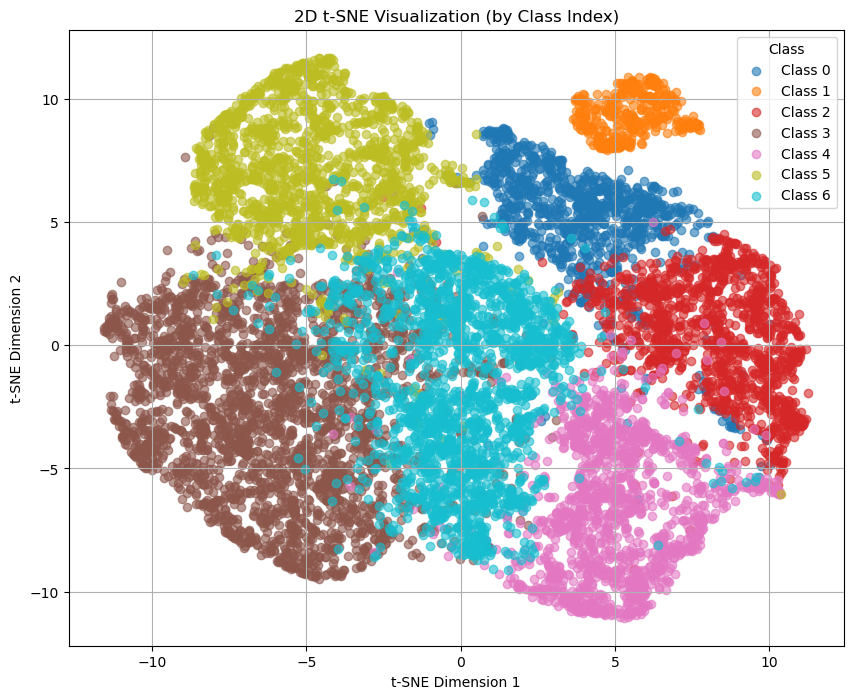

正在计算3D t-SNE...


d:\anaconda\Lib\site-packages\sklearn\manifold\_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
C:\Users\yuyue\AppData\Local\Temp\ipykernel_17160\512339372.py:36: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('tab10',  len(np.unique(y_numeric)))


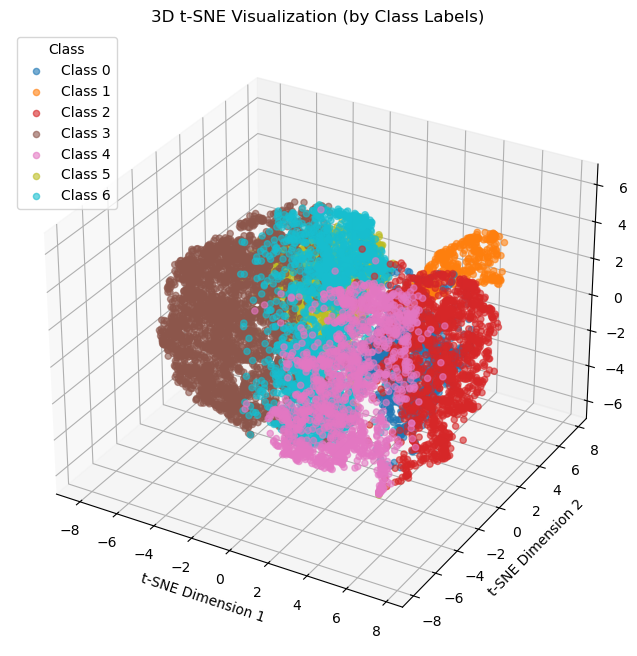

In [7]:
import os
from sklearn.preprocessing import LabelEncoder

def visualize_2d_tsne(X, y_numeric, save_path='visual_pict'):
    print("正在计算2D t-SNE...")
    tsne_2d = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=300)
    X_tsne_2d = tsne_2d.fit_transform(X)


    plt.figure(figsize=(10, 8))
    cmap = plt.cm.get_cmap('tab10', len(np.unique(y_numeric)))

    for i in np.unique(y_numeric):
        idx = y_numeric == i
        plt.scatter(X_tsne_2d[idx, 0], X_tsne_2d[idx, 1],
                    alpha=0.6, c=[cmap(i)], label=f'Class {i}')

    plt.legend(title='Class', loc='best')
    plt.title('2D t-SNE Visualization (by Class Index)')
    plt.xlabel('t-SNE Dimension 1')
    plt.ylabel('t-SNE Dimension 2')
    plt.grid(True)
    plt.savefig(f'{save_path}/tsne_label_2d_all.png', dpi=300, bbox_inches='tight')
    plt.show()

def visualize_3d_tsne(X, y_numeric, save_path='visual_pict'):
    print("正在计算3D t-SNE...")
    tsne_3d = TSNE(n_components=3, random_state=42, perplexity=30, n_iter=300)
    X_tsne_3d = tsne_3d.fit_transform(X)

    os.makedirs(save_path, exist_ok=True)


    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    cmap = plt.cm.get_cmap('tab10',  len(np.unique(y_numeric)))

    for i, class_label in enumerate(np.unique(y_numeric)):
        idx = y_numeric == class_label
        ax.scatter(X_tsne_3d[idx, 0], X_tsne_3d[idx, 1], X_tsne_3d[idx, 2],
                   alpha=0.6, color=cmap(i), label=f'Class {i}')
        

    ax.set_title('3D t-SNE Visualization (by Class Labels)')
    ax.set_xlabel('t-SNE Dimension 1')
    ax.set_ylabel('t-SNE Dimension 2')
    ax.set_zlabel('t-SNE Dimension 3')
    ax.legend(title='Class', loc='upper left')
    plt.savefig(f'{save_path}/tsne_label_3d_all.png', dpi=300, bbox_inches='tight')
    plt.show()

visualize_2d_tsne(X_sample, np.argmax(y_sample, axis=1))
visualize_3d_tsne(X_sample, np.argmax(y_sample, axis=1)) 

In [8]:
! pip install plotly

In [9]:
import plotly.express as px
import plotly.io as pio
import os
from sklearn.manifold import TSNE
import numpy as np

def visualize_2d_tsne_interactive(X, y_numeric, save_path='visual_pict'):
    print("正在计算2D t-SNE...")
    tsne_2d = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=300)
    X_tsne_2d = tsne_2d.fit_transform(X)

    os.makedirs(save_path, exist_ok=True)

    fig = px.scatter(
        x=X_tsne_2d[:, 0], 
        y=X_tsne_2d[:, 1], 
        color=[str(label) for label in y_numeric],
        labels={'color': 'Class'},
        hover_name=[f"Sample {i} - Class {label}" for i, label in enumerate(y_numeric)],
        title="2D t-SNE Interactive Visualization",
        color_discrete_sequence=px.colors.qualitative.Dark24
    )
    
    fig.update_layout(
        width=900,
        height=700,
        template="plotly_white"
    )

    fig.write_html(f"{save_path}/tsne_2d_interactive.html")
    fig.show()


def visualize_3d_tsne_interactive(X, y_numeric, save_path='visual_pict'):
    print("正在计算3D t-SNE...")
    tsne_3d = TSNE(n_components=3, random_state=42, perplexity=30, n_iter=300)
    X_tsne_3d = tsne_3d.fit_transform(X)

    os.makedirs(save_path, exist_ok=True)

    fig = px.scatter_3d(
        x=X_tsne_3d[:, 0],
        y=X_tsne_3d[:, 1],
        z=X_tsne_3d[:, 2],
        color=[str(label) for label in y_numeric],
        labels={'color': 'Class'},
        hover_name=[f"Sample {i} - Class {label}" for i, label in enumerate(y_numeric)],
        title="3D t-SNE Interactive Visualization",
        color_discrete_sequence=px.colors.qualitative.Dark24
    )
    
    fig.update_layout(
        width=1000,
        height=800,
        template="plotly_white"
    )

    fig.write_html(f"{save_path}/tsne_3d_interactive.html")
    fig.show()


visualize_2d_tsne_interactive(X_sample, np.argmax(y_sample, axis=1))
visualize_3d_tsne_interactive(X_sample, np.argmax(y_sample, axis=1))


正在计算2D t-SNE...


d:\anaconda\Lib\site-packages\sklearn\manifold\_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


正在计算3D t-SNE...


d:\anaconda\Lib\site-packages\sklearn\manifold\_t_sne.py:1162: FutureWarning:

'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.



In [11]:
def compute_pairwise_class_confusion(X_tsne, y_numeric, class_a, class_b, distance_threshold=5.0):
    """
    计算在 t-SNE 空间中，class_a 和 class_b 之间的混淆情况
    - 只统计 A 类样本到 B 类样本的距离是否小于阈值
    - 输出两个方向上的混淆数 和 样本总数
    """
    X_a = X_tsne[y_numeric == class_a]
    X_b = X_tsne[y_numeric == class_b]

    count_a = len(X_a)
    count_b = len(X_b)

    close_a_to_b = 0
    for xa in X_a:
        distances = np.linalg.norm(X_b - xa, axis=1)
        close_a_to_b += np.sum(distances < distance_threshold)

    close_b_to_a = 0
    for xb in X_b:
        distances = np.linalg.norm(X_a - xb, axis=1)
        close_b_to_a += np.sum(distances < distance_threshold)

    result = {
        'class_a': class_a,
        'class_b': class_b,
        'class_a_count': count_a,
        'class_b_count': count_b,
        'a_to_b_confused': close_a_to_b,
        'b_to_a_confused': close_b_to_a
    }
    return result


from sklearn.manifold import TSNE

# 假设你已有：X_sample 和 y_sample（独热编码）
X_tsne = TSNE(n_components=2, random_state=42).fit_transform(X_sample)
y_labels = np.argmax(y_sample, axis=1)

# 检查类 2 和类 7 之间的混淆程度（设定距离阈值为 5.0）
confusion_result = compute_pairwise_class_confusion(X_tsne, y_labels, class_a=2, class_b=7, distance_threshold=5.0)

print(confusion_result)


{'class_a': 2, 'class_b': 7, 'class_a_count': 1313, 'class_b_count': 0, 'a_to_b_confused': 0, 'b_to_a_confused': 0}


正在计算2D PCA...


C:\Users\yuyue\AppData\Local\Temp\ipykernel_17160\1501199320.py:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('tab10', len(np.unique(y_numeric)))


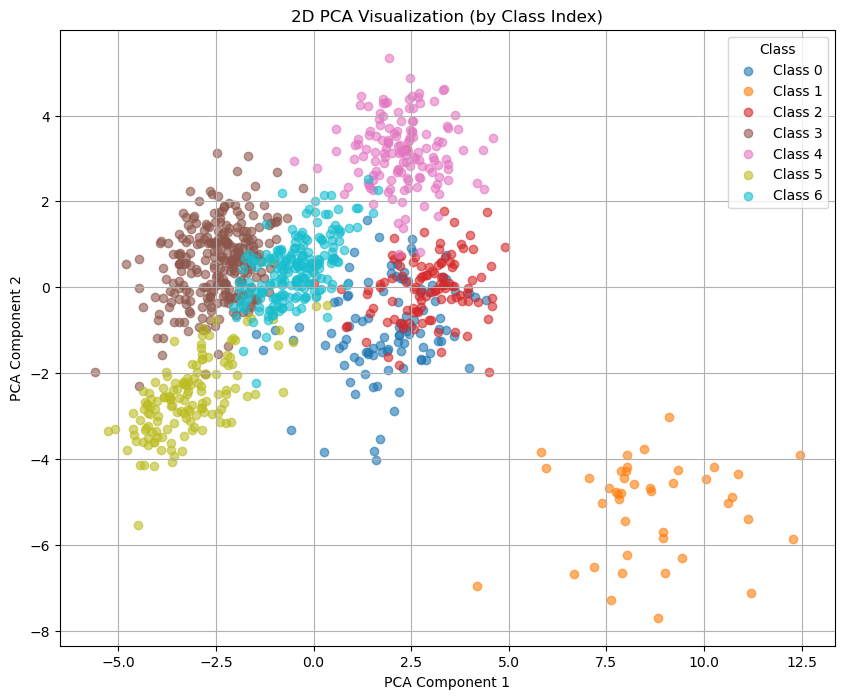

正在计算3D PCA...


C:\Users\yuyue\AppData\Local\Temp\ipykernel_17160\1501199320.py:33: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('tab10', len(np.unique(y_numeric)))


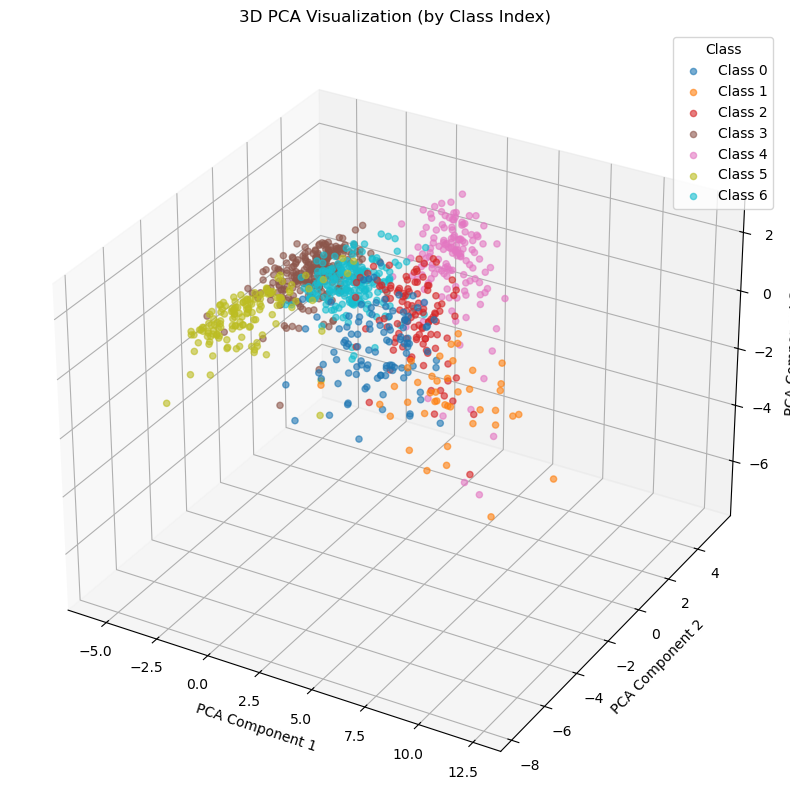

In [5]:
from sklearn.decomposition import PCA

def visualize_2d_pca(X, y_numeric, save_path='visual_pict'):
    print("正在计算2D PCA...")
    pca_2d = PCA(n_components=2)
    X_pca_2d = pca_2d.fit_transform(X)

    os.makedirs(save_path, exist_ok=True)

    plt.figure(figsize=(10, 8))
    cmap = plt.cm.get_cmap('tab10', len(np.unique(y_numeric)))

    for i in np.unique(y_numeric):
        idx = y_numeric == i
        plt.scatter(X_pca_2d[idx, 0], X_pca_2d[idx, 1],
                    alpha=0.6, c=[cmap(i)], label=f'Class {i}')

    plt.legend(title='Class', loc='best')
    plt.title('2D PCA Visualization (by Class Index)')
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.grid(True)
    plt.savefig(f'{save_path}/pca_label_2d.png', dpi=300, bbox_inches='tight')
    plt.show()

def visualize_3d_pca(X, y_numeric, save_path='visual_pict'):
    print("正在计算3D PCA...")
    pca_3d = PCA(n_components=3)
    X_pca_3d = pca_3d.fit_transform(X)

    fig = plt.figure(figsize=(12, 10))
    ax = fig.add_subplot(111, projection='3d')
    cmap = plt.cm.get_cmap('tab10', len(np.unique(y_numeric)))

    for i in np.unique(y_numeric):
        idx = y_numeric == i
        ax.scatter(X_pca_3d[idx, 0], X_pca_3d[idx, 1], X_pca_3d[idx, 2],
                   alpha=0.6, c=[cmap(i)], label=f'Class {i}')

    ax.set_title('3D PCA Visualization (by Class Index)')
    ax.set_xlabel('PCA Component 1')
    ax.set_ylabel('PCA Component 2')
    ax.set_zlabel('PCA Component 3')
    ax.legend(title='Class', loc='best')
    plt.savefig(f'{save_path}/pca_label_3d.png', dpi=300, bbox_inches='tight')
    plt.show()


visualize_2d_pca(X_sample, np.argmax(y_sample, axis=1))
visualize_3d_pca(X_sample, np.argmax(y_sample, axis=1))


正在计算2D PCA...


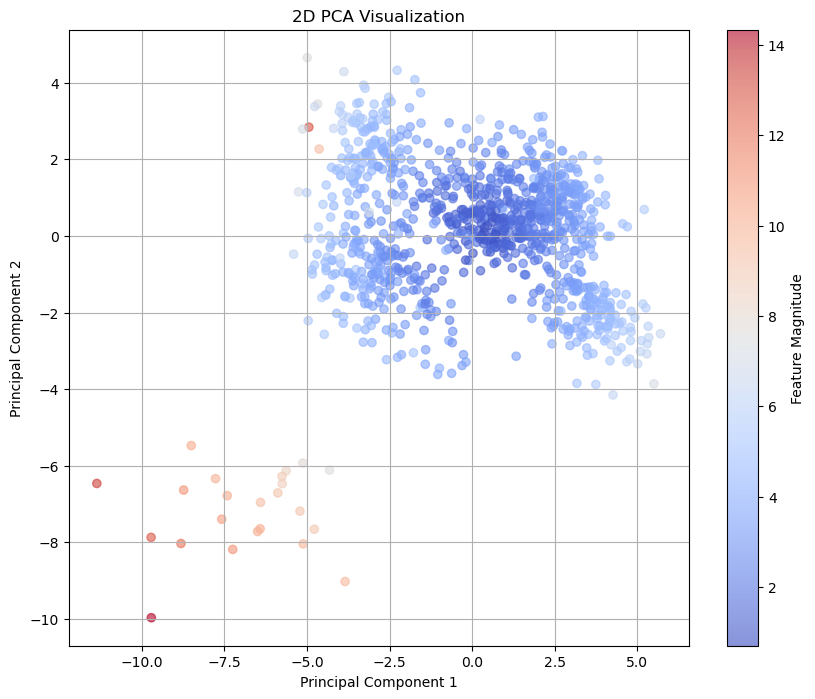

In [4]:
from sklearn.decomposition import PCA

def visualize_pca_2d(X, save_path='visual_pict'):
    print("正在计算2D PCA...")
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)
    
    plt.figure(figsize=(10, 8))
    plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.6, 
                c=np.linalg.norm(X, axis=1), cmap='coolwarm')
    plt.colorbar(label='Feature Magnitude')
    plt.title('2D PCA Visualization')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.grid(True)
    plt.savefig(f'{save_path}/pca_2d.png', dpi=300, bbox_inches='tight')
    plt.show()

visualize_pca_2d(X_sample, save_path)

In [7]:
import umap

def visualize_umap_2d(X, save_path='visual_pict'):
    print("正在计算2D UMAP...")
    reducer = umap.UMAP(n_components=2, random_state=42)
    X_umap = reducer.fit_transform(X)

    plt.figure(figsize=(10, 8))
    plt.scatter(X_umap[:, 0], X_umap[:, 1], alpha=0.6,
                c=np.linalg.norm(X, axis=1), cmap='plasma')
    plt.colorbar(label='Feature Magnitude')
    plt.title('2D UMAP Visualization')
    plt.xlabel('UMAP Dimension 1')
    plt.ylabel('UMAP Dimension 2')
    plt.grid(True)
    plt.savefig(f'{save_path}/umap_2d.png', dpi=300, bbox_inches='tight')
    plt.show()
    
visualize_umap_2d(X_sample, save_path)


正在计算2D UMAP...


AttributeError: module 'umap' has no attribute 'UMAP'

正在计算2D Isomap...


d:\anaconda\Lib\site-packages\sklearn\manifold\_isomap.py:383: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
d:\anaconda\Lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


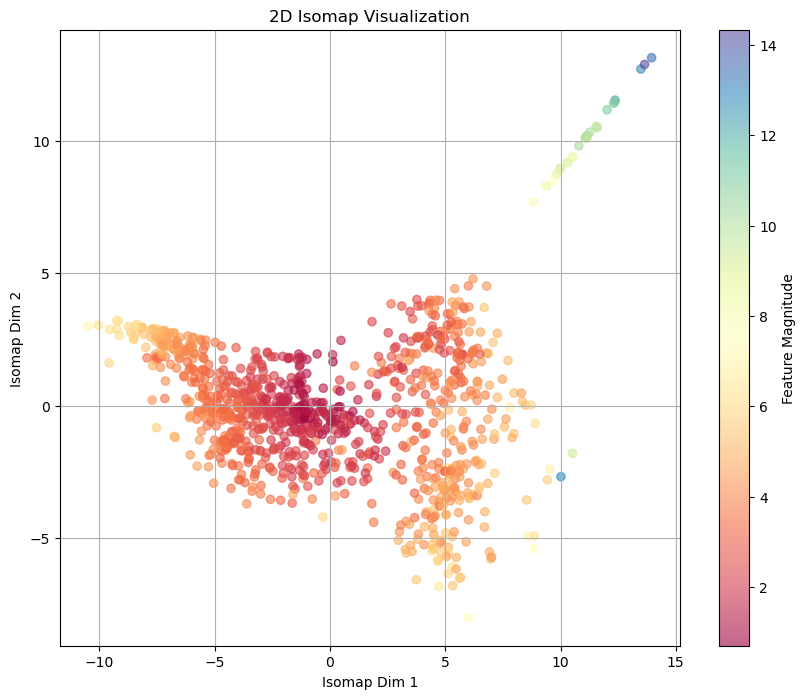

In [8]:
from sklearn.manifold import Isomap

def visualize_isomap_2d(X, save_path='visual_pict'):
    print("正在计算2D Isomap...")
    isomap = Isomap(n_components=2)
    X_iso = isomap.fit_transform(X)

    plt.figure(figsize=(10, 8))
    plt.scatter(X_iso[:, 0], X_iso[:, 1], alpha=0.6,
                c=np.linalg.norm(X, axis=1), cmap='Spectral')
    plt.colorbar(label='Feature Magnitude')
    plt.title('2D Isomap Visualization')
    plt.xlabel('Isomap Dim 1')
    plt.ylabel('Isomap Dim 2')
    plt.grid(True)
    plt.savefig(f'{save_path}/isomap_2d.png', dpi=300, bbox_inches='tight')
    plt.show()

visualize_isomap_2d(X_sample, save_path)

正在计算2D LLE...


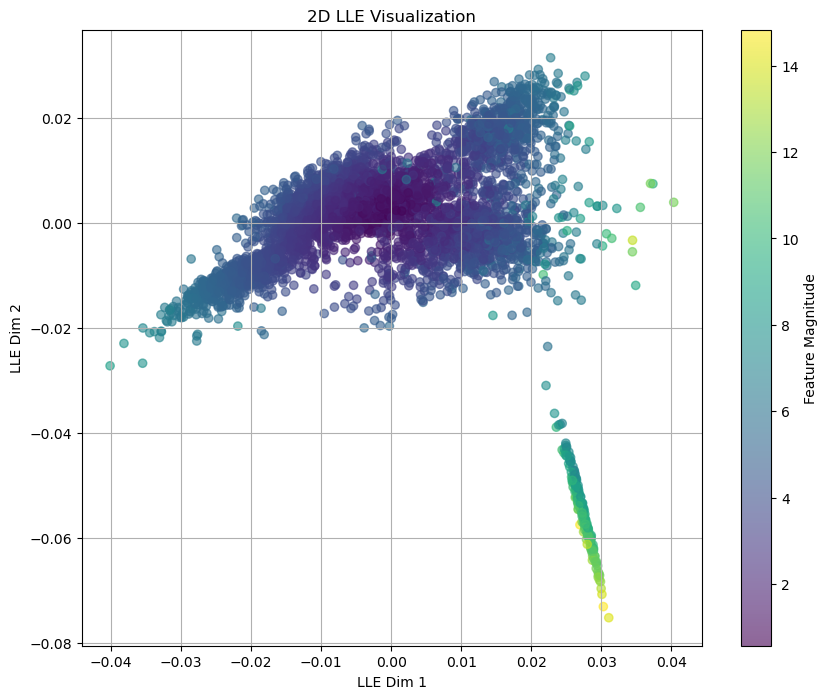

In [11]:
from sklearn.manifold import LocallyLinearEmbedding

def visualize_lle_2d(X, save_path='visual_pict'):
    print("正在计算2D LLE...")
    lle = LocallyLinearEmbedding(n_components=2, n_neighbors=30)
    X_lle = lle.fit_transform(X)

    plt.figure(figsize=(10, 8))
    plt.scatter(X_lle[:, 0], X_lle[:, 1], alpha=0.6,
                c=np.linalg.norm(X, axis=1), cmap='viridis')
    plt.colorbar(label='Feature Magnitude')
    plt.title('2D LLE Visualization')
    plt.xlabel('LLE Dim 1')
    plt.ylabel('LLE Dim 2')
    plt.grid(True)
    plt.savefig(f'{save_path}/lle_2d.png', dpi=300, bbox_inches='tight')
    plt.show()

visualize_lle_2d(X_sample, save_path)